In [19]:
library(ggplot2)
df = read.csv("ElectronMobility.csv")

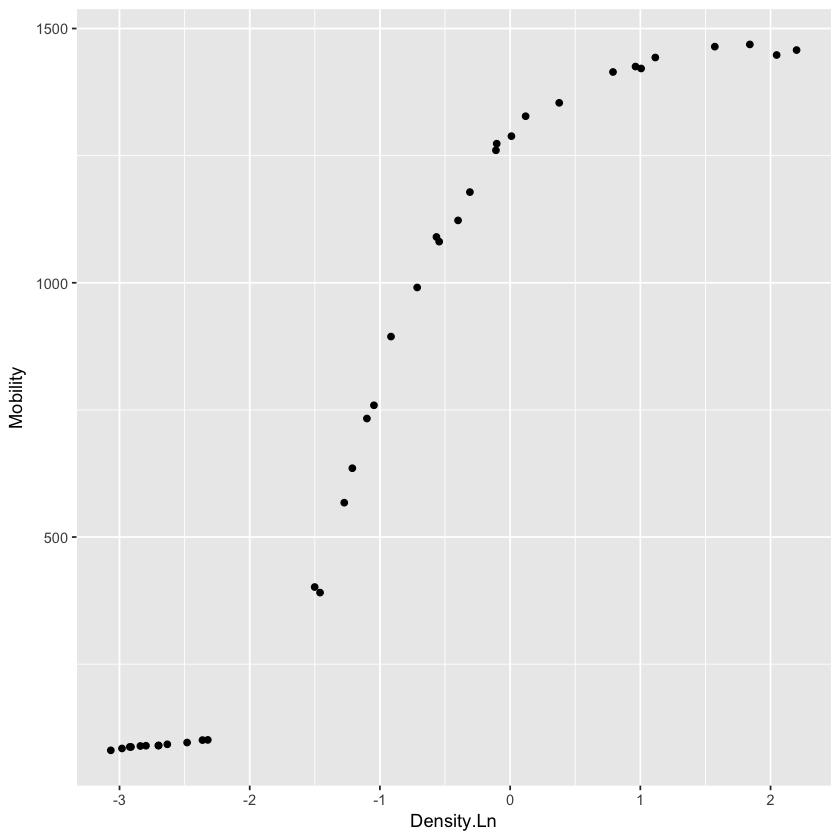

In [20]:
ggplot(data = df, aes(x=Density.Ln, y=Mobility)) +
    geom_point()

In [21]:
# define the model
model <- lm(Mobility ~ poly(Density.Ln, 3), data = df)
summary(model)


Call:
lm(formula = Mobility ~ poly(Density.Ln, 3), data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-151.26  -64.73   14.34   41.65  114.62 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)            783.21      11.92  65.715  < 2e-16 ***
poly(Density.Ln, 3)1  3249.61      72.50  44.824  < 2e-16 ***
poly(Density.Ln, 3)2  -647.06      72.50  -8.925 2.58e-10 ***
poly(Density.Ln, 3)3  -559.91      72.50  -7.723 6.78e-09 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 72.5 on 33 degrees of freedom
Multiple R-squared:  0.9849,	Adjusted R-squared:  0.9835 
F-statistic: 716.2 on 3 and 33 DF,  p-value: < 2.2e-16


In [22]:
lm_eqn <- function(m){
    eq <- substitute(italic(y) == a + b %.% italic(x) + c %.% italic(x)^2 + d %.% italic(x)^3*","~~italic(r)^2~"="~r2, 
         list(a = format(coef(m)[1], digits = 2), 
              b = format(coef(m)[2], digits = 2),
              c = format(coef(m)[3], digits = 2),
              d = format(coef(m)[4], digits = 2),
             r2 = format(summary(m)$r.squared, digits = 3)))
    as.character(as.expression(eq));                 
}

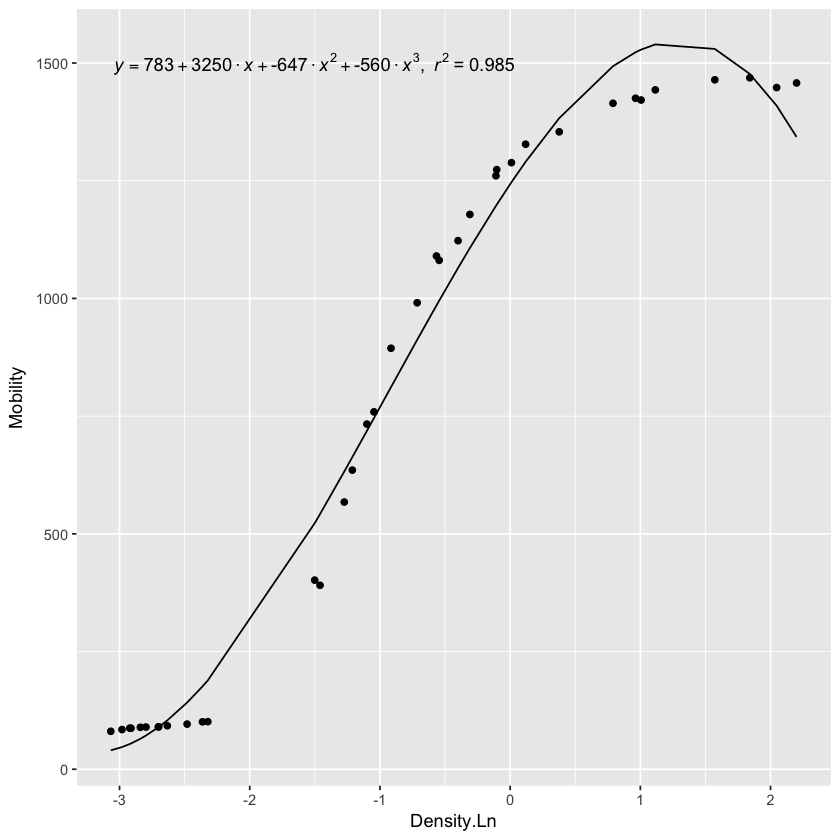

In [23]:
ggplot(data=df, aes(x=Density.Ln, y=Mobility)) +
    geom_point() +
    geom_line(aes(x=Density.Ln, y = fitted(model))) +
    annotate("text", x = -1.5, y = 1500, label = lm_eqn(model), parse = TRUE)

In [24]:
df$fit = fitted(model)
df$residual = residuals(model)

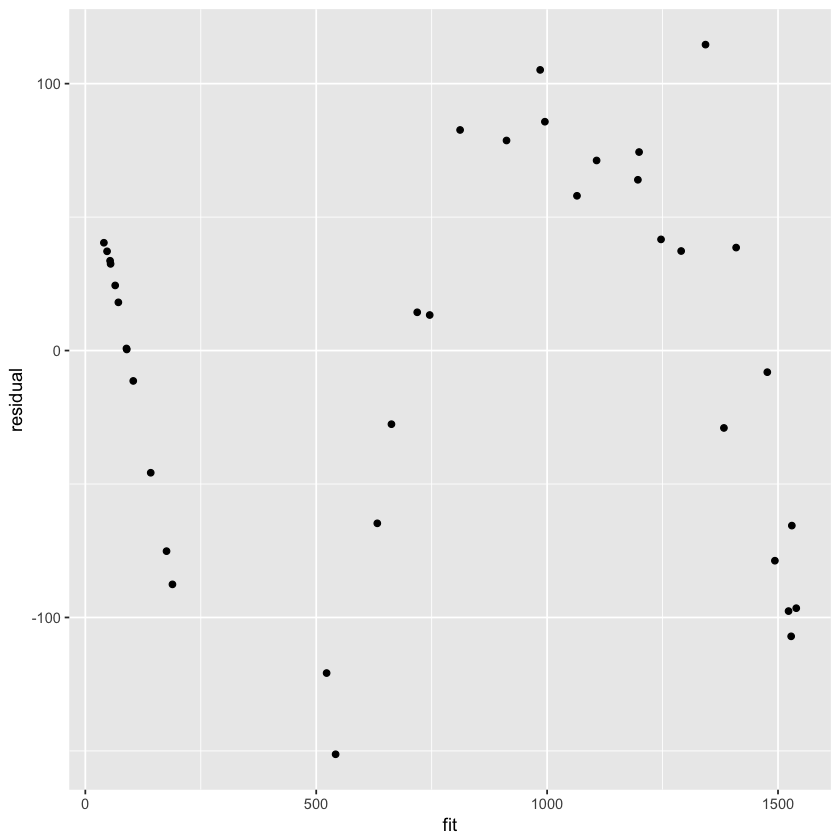

In [25]:
ggplot(data = df, aes(x=fit, y=residual)) +
    geom_point()

In [97]:
fitfun<-function(b0,b1,b2,b3,b4,b5,b6,b7,x){    
  (b0 + b1*x + b2*x^2 + b3*x^3)/
  (b4 + b5*x + b6*x^2 + b7*x^3)
  }

nl_mod <- nls(Mobility ~ fitfun(b0,b1,b2,b3,b4,b5,b6,b7,Density.Ln), 
              start = list(b0=1288.14,b1=1491.08, b2=583.238, b3=75.4167, b4=1, b5=0.966, b6=0.3979, b7=.049), 
              data = df)

ERROR: Error in nls(Mobility ~ fitfun(b0, b1, b2, b3, b4, b5, b6, b7, Density.Ln), : step factor 0.000488281 reduced below 'minFactor' of 0.000976562


In [60]:
fm1 <- nls(circumference ~ A/(1+exp((B-age)/C)), Orange,
           start = list(A = 160, B = 700, C = 350))